# Gradient Descent

gradient descent 방법을 적용하여 다음 함수의 최저점을 구하여라.$$ f(x) = \frac{1}{2}x^4 -3 x^3 $$

In [103]:
import numpy as np
import matplotlib.pyplot as plt

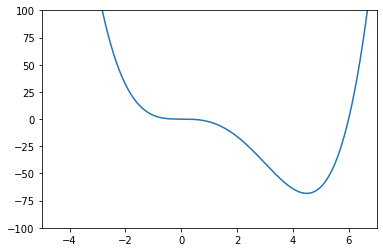

In [104]:
x = np.arange(-10,10,0.01)
def f(x):
    return 0.5*x**4 - 3*x**3
plt.ylim(-100,100)
plt.xlim(-5,7)
plt.plot(x,f(x));

In [105]:
x = 6
x_old = 0
eps = 0.01
precision = 0.000001

def fp(x):
    return 2*x**3-9*x**2

In [106]:
while (abs(x-x_old)>precision):
    x_old = x
    x = x_old - eps*fp(x_old)
x

4.50000120505241

# Diabetes (regression)

다음의 당뇨 데이터를 회귀 분석하여라. 나이, BMI, 혈압, Y (당뇨병 진행 정도) 데이터를 이용하여라.

1. sklearn을 이용하지 않고 (자신의 코드로)
2. sklearn을 이용해서

In [107]:
from sklearn import datasets, linear_model
diabetes=datasets.load_diabetes()

In [108]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [109]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

In [110]:
X_age=diabetes.data[:,0] # 나이
X_bmi=diabetes.data[:,2] # BMI
X_p=diabetes.data[:,3] # 혈압
Y = diabetes.target

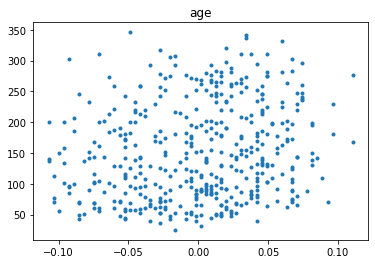

In [111]:
plt.plot(X_age, Y, '.')
plt.title('age');

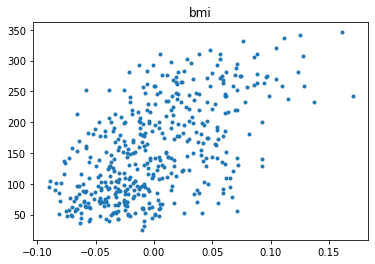

In [112]:
plt.plot(X_bmi, Y, '.')
plt.title('bmi');

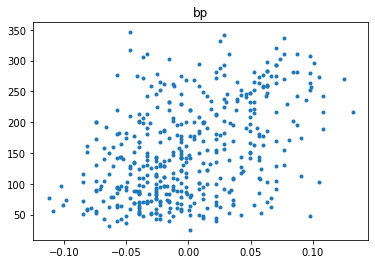

In [113]:
plt.plot(X_p, Y, '.')
plt.title('bp');

## Linear Regression

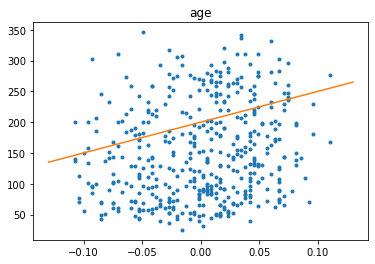

In [114]:
x = np.array(diabetes.data[:,0])
y = np.array(diabetes.target)

X = np.array([[i] for i in x])
Y = np.array([[i] for i in y])
plt.plot(x,y,'.')
Z = np.arange(-0.13,0.13,0.0001)

a, b = 500, 200

plt.plot(Z,a*Z+b);
plt.title('age');

In [115]:
yh = a*x+b
yh

array([219.03795322, 199.05899174, 242.64945315, 155.46853032,
       202.69153019, 153.6522611 , 177.26376103, 231.7518378 ,
       220.85422244, 164.54987645, 151.83599187, 213.58914554,
       208.14033786, 202.69153019, 222.67049167, 173.63122258,
       197.24272251, 235.38437625, 180.89629948, 186.34510716,
       175.4474918 , 157.28479955, 157.28479955, 222.67049167,
       168.1824149 , 166.36614568, 146.3871842 , 188.16137638,
       226.30303012, 233.56810702, 169.99868413, 188.16137638,
       217.22168399, 215.40541477, 208.14033786, 224.48676089,
       206.32406864, 195.42645329, 199.05899174, 199.05899174,
       202.69153019, 150.01972265, 169.99868413, 209.95660709,
       222.67049167, 213.58914554, 171.81495335, 160.917338  ,
       233.56810702, 179.08003026, 217.22168399, 229.93556857,
       173.63122258, 195.42645329, 175.4474918 , 179.08003026,
       179.08003026, 186.34510716, 220.85422244, 231.7518378 ,
       164.54987645, 179.08003026, 186.34510716, 182.71

In [116]:
np.mean((yh-y)**2)

8098.50209382736

In [117]:
def f(a,b,xi):
    return a*xi+b

def mse(a,b,y):
    y_hat=a*x+b
    return np.mean((y_hat-y)**2)

In [118]:
a=500; b=200;
mse(a,b,y)

8098.50209382736

In [119]:
eps = 5
mse(a+eps,b,y),mse(a-eps,b,y)

(8102.988902095952, 8094.128407730715)

In [120]:
mse(a,b+eps,y), mse(a, b-eps, y)

(8602.1672521984, 7644.836935456322)

In [121]:
eps=0.1
n=0;
while(n<50000):
    if(mse(a+eps,b,y)>mse(a-eps,b,y)):
        a=a-eps
    else:
        a=a+eps
    
    if(mse(a,b+eps,y)>mse(a,b-eps,y)):
        b=b-eps
    else:
        b=b+eps
    n=n+1

In [122]:
a,b

(304.1999999999555, 152.20000000000272)

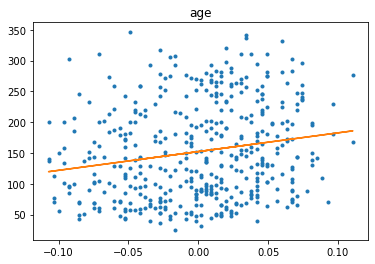

In [123]:
plt.plot(x,y,'.')
plt.plot(X,f(a,b,X))
plt.title('age');

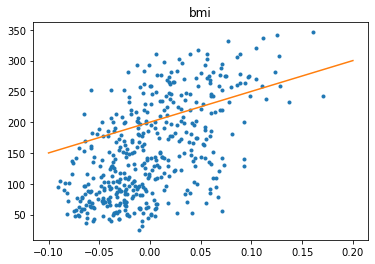

In [124]:
x = np.array(diabetes.data[:,2])
y = np.array(diabetes.target)

X = np.array([[i] for i in x])
Y = np.array([[i] for i in y])
plt.plot(x,y,'.')
Z = np.arange(-0.10,0.20,0.0001)

a, b = 500, 200

plt.plot(Z,a*Z+b);
plt.title('bmi');

In [125]:
yh = a*x+b

np.mean((yh-y)**2)

def f(a,b,xi):
    return a*xi+b

def mse(a,b,y):
    y_hat=a*x+b
    return np.mean((y_hat-y)**2)

a=500; b=200;
mse(a,b,y)

6638.6555194929915

In [126]:
eps = 5
mse(a+eps,b,y),mse(a-eps,b,y)

(6628.543862018239, 6648.88029913969)

In [127]:
mse(a,b+eps,y), mse(a, b-eps, y)

(7142.320677864028, 6184.990361121955)

In [128]:
eps=0.1
n=0;
while(n<50000):
    if(mse(a+eps,b,y)>mse(a-eps,b,y)):
        a=a-eps
    else:
        a=a+eps
    
    if(mse(a,b+eps,y)>mse(a,b-eps,y)):
        b=b-eps
    else:
        b=b+eps
    n=n+1

In [129]:
a,b

(949.4000000001022, 152.20000000000272)

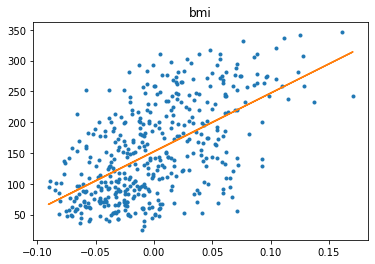

In [130]:
plt.plot(x,y,'.')
plt.plot(X,f(a,b,X))
plt.title('bmi');

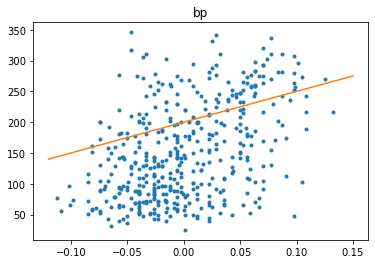

In [131]:
x = np.array(diabetes.data[:,3])
y = np.array(diabetes.target)

X = np.array([[i] for i in x])
Y = np.array([[i] for i in y])
plt.plot(x,y,'.')
Z = np.arange(-0.12,0.15,0.0001)

a, b = 500, 200

plt.plot(Z,a*Z+b);
plt.title('bp');

In [132]:
yh = a*x+b

np.mean((yh-y)**2)

def f(a,b,xi):
    return a*xi+b

def mse(a,b,y):
    y_hat=a*x+b
    return np.mean((y_hat-y)**2)

a=500; b=200;
mse(a,b,y)

7169.636552705218

In [133]:
eps = 5
mse(a+eps,b,y),mse(a-eps,b,y)

(7164.834705562588, 7174.551522019796)

In [134]:
mse(a,b+eps,y), mse(a, b-eps, y)

(7673.301711076259, 6715.9713943341785)

In [135]:
eps=0.1
n=0;
while(n<50000):
    if(mse(a+eps,b,y)>mse(a-eps,b,y)):
        a=a-eps
    else:
        a=a+eps
    
    if(mse(a,b+eps,y)>mse(a,b-eps,y)):
        b=b-eps
    else:
        b=b+eps
    n=n+1

In [136]:
a,b

(714.8000000000488, 152.20000000000272)

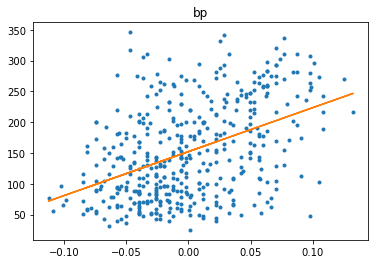

In [137]:
plt.plot(x,y,'.')
plt.plot(X,f(a,b,X))
plt.title('bp');

## scikit-learn(diabetes)

In [138]:
from sklearn.linear_model import LinearRegression

In [139]:
x = np.array(diabetes.data[:,0])
y = np.array(diabetes.target)

X = np.array([[i] for i in x])
Y = np.array([[i] for i in y])

f=LinearRegression()
f.fit(X,Y)

f.coef_, f.intercept_

(array([[304.18307453]]), array([152.13348416]))

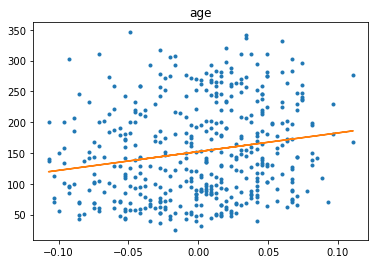

In [140]:
plt.plot(x,y,'.')
plt.plot(x,f.predict(X))
plt.title('age');

In [141]:
x = np.array(diabetes.data[:,2])
y = np.array(diabetes.target)

X = np.array([[i] for i in x])
Y = np.array([[i] for i in y])

f=LinearRegression()
f.fit(X,Y)

f.coef_, f.intercept_

(array([[949.43526038]]), array([152.13348416]))

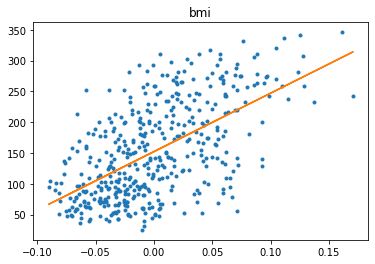

In [142]:
plt.plot(x,y,'.')
plt.plot(x,f.predict(X))
plt.title('bmi');

In [143]:
x = np.array(diabetes.data[:,3])
y = np.array(diabetes.target)

X = np.array([[i] for i in x])
Y = np.array([[i] for i in y])

f=LinearRegression()
f.fit(X,Y)

f.coef_, f.intercept_

(array([[714.7416437]]), array([152.13348416]))

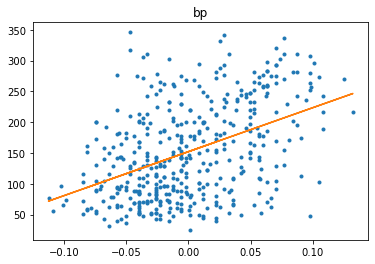

In [144]:
plt.plot(x,y,'.')
plt.plot(x,f.predict(X))
plt.title('bp');